<h1> Installing and Importing Required Libraries </h1>

# Reading Resumes and Job Descriptions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Making directory of Resumes and Job Description
directory = './Data/'
resume_path = directory + 'Resumes/'
jd_path = directory + 'JD/'

In [ ]:
!pip install mammoth
!pip install textract==1.6.3
!pip install -U nltk
!pip install pdfminer3
!pip install openpyxl
!pip install PyPDF2
!python -m spacy download en_core_web_sm
!pip install wordcloud
import os
import mammoth
import textract
#from pdfminer.high_level import extract_text  # Remove the pdfminer import
import PyPDF2 # Import PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.6/111.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 70.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 7.2 MB/s eta 0:00:00
 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pdfminer3: filename=pdfminer3-2018.12.3.0-py3-none-any.whl size=117806 sha256=8d888ccea8bb9d07462af6033305ce65675bb347b77d09d8f1b172e99cccb891
  Stored in directory: /root/.cache/pip/wheels/f6/b3/f8/d51be9cc4df1b35d7a2be7d7f1caf4859dcbe788b197ecb44d
Successfully built pdfminer3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Importing required libraries
import pandas as pd
from pdfminer3.layout import LAParams
from pdfminer3.pdfpage import PDFPage
from pdfminer3.pdfinterp import PDFResourceManager
from pdfminer3.pdfinterp import PDFPageInterpreter
from pdfminer3.converter import TextConverter
import io
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
nlp = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import mammoth

nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.corpus import wordnet
nltk.download('wordnet')
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nl

In [ ]:
def pdf_extractor(path):
    try:
        with open(path, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            num_pages = len(reader.pages)
            text = ""
            for page_num in range(num_pages):
                page = reader.pages[page_num]
                text += page.extract_text()
            return text
    except Exception as e:
        print(f'Error reading pdf file: {path} - {e}')
        return ""  # Return an empty string if extraction fails

In [ ]:
def read_files(file_path):
    fileTXT = []
    for filename in os.listdir(file_path):
        full_path = os.path.join(file_path, filename)  # Create full path
        if filename.endswith(".pdf"):
            try:
                fileTXT.append(pdf_extractor(full_path))
            except Exception as e:
                print(f'Error reading pdf file: {filename} - {e}')
        elif filename.endswith(".docx"):
            try:
                with open(full_path, "rb") as docx_file:
                    result = mammoth.extract_raw_text(docx_file)
                    text = result.value
                    fileTXT.append(text)
            except IOError:
                print(f'Error reading .docx file: {filename}')
        elif filename.endswith(".doc"):
            try:
                text = textract.process(full_path).decode('utf-8')
                fileTXT.append(text)
            except Exception as e:
                print(f'Error reading .doc file: {filename} - {e}')
        elif filename.endswith(".txt"):
            try:
                with open(full_path, "r") as txt_file:
                    contents = txt_file.read()
                    fileTXT.append(contents)
            except Exception as e:
                print(f'Error reading .txt file: {filename} - {e}')
    return fileTXT

In [ ]:
resume_folder = "/content/drive/MyDrive/Data/Resumes"
resume_texts = read_files(resume_folder)

/usr/local/lib/python3.11/dist-packages/PyPDF2/_cmap.py:142: PdfReadWarning: Advanced encoding /SymbolSetEncoding not implemented yet
  warnings.warn(


In [ ]:
resume_data = []

for filename in os.listdir(resume_folder):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(resume_folder, filename)
        text = pdf_extractor(pdf_path)
        resume_data.append({'filename': filename, 'text': text})

df = pd.DataFrame(resume_data)
df.head(5) # Display the first 5 rows of the DataFrame

,filename,text
0,102.pdf,CURRICULUM VITAE \nPRASHANT JOSHI ...
1,103.pdf,...
2,107.pdf,Vijay Jawre ...
3,108.pdf,\n \n \n \n \n \n \n \n \n ...
4,100.pdf,CURRICULUM VITAE \n ...


In [ ]:
#resumeTxt is a list containing the résumés of all the candidates.

# Calling the function read_files to read all the resumes
resumeTxt = read_files("/content/drive/MyDrive/Data/Resumes")

#Remove 'CURRICULUM VITAE' from list
for i in range(len(resumeTxt)):
    resumeTxt[i] = resumeTxt[i].replace("CURRICULUM VITAE","")
    resumeTxt[i] = resumeTxt[i].replace("CURRICULUM","")
    resumeTxt[i] = resumeTxt[i].replace("VITAE","")
    resumeTxt[i] = resumeTxt[i].replace("Vitae","")

# Displaying the first resume
resumeTxt[0]

/usr/local/lib/python3.11/dist-packages/PyPDF2/_cmap.py:142: PdfReadWarning: Advanced encoding /SymbolSetEncoding not implemented yet
  warnings.warn(


'        \nPRASHANT JOSHI                                                                                                                            \n \nAddress for Correspondence: –\nH.no-2\nNear Manu Maharani Resort\nV/P.O- Dhikuli , Ramnagar\nDistt-Nainital\nUttarakhand\nPin code-244715\nPhone:   +918171972400,+918302583313\nEmail:     pjoshi2509@gmail.com\n          \nCAREER OBJECTIVE                                                                 \nMy goal is to be associated with a company where I can utilize my skills and gain further experience\nwhile enhancing the company’s productivity and reputation.\nACADEMIC PROFILE\nYear(s)Qualification  -\nDegree/Diploma/Certificat\neBoard/\nUniversityCollege/\nInstitutePercentage/\nCGPA\n2009-13B.Tech R.T.USiddhi Vinayak \ncollege67% \n2009Class XII C.B.S.E.Amtul’S\nPublic School60%\n2007Class X C.B.S.ES.D.D.C.M.P.  \nSchool64%\nWORK EXPERIENCE\n\uf0b7Fresher\nTRAINING AND PROJECTS  UNDERTAKEN\nSummer Internship  \nFirm Name:  Kanha Pr

In [ ]:
# Calling the function read_files to read all the JDs
jd_path = "/content/drive/MyDrive/Data/JD"
jdTxt = read_files(jd_path)

# Displaying the first Job Description
jdTxt[0]

"                                                                            \nJOB DESCRIPTION  \nDATA ANALYST  \nDuties include  reviewing and analyzing information from certified payroll records and inspecting to ensure labor \ncompliance laws and  regulations are adhered to by  inquiring and requesting submittal of payroll records .  Work \nrequires attention to detail and knowledge of labor compliance laws and regulations.  General direction is \nreceived from the Project Technologist and Project Manage r. \n \nEssential Functions : \n\uf0b7 Collects and collates appropriate data from certified payroll reports  via LCPtracker  \n\uf0b7 Reviews and analyzes data  in accordance with labor standards and regulations  \n\uf0b7 Implements data collection systems and other strategies to optimize e fficiency and data quality  \n\uf0b7 Generates and writes reports of data analyses  \n\uf0b7 Conceptualizes data and provide effective presentation of data output  \n\uf0b7 Coordinates with site

# Text Processing

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# This function helps us in removing stopwords, punctuation marks, special characters, extra spaces and numeric data. It also lowercases all the text.

def preprocessing(Txt):
    sw = stopwords.words('english')
    space_pattern = '\s+'
    special_letters = "[^a-zA-Z#]"
    p_txt = []
    for resume in Txt:
        text = re.sub(space_pattern, ' ', resume) # Removes extra spaces
        text = re.sub(special_letters, ' ', text) # Removes special characters
        text = re.sub(r'[^\w\s]','',text) # Removes punctuations
        text = text.split() # Splits the words in a text
        text = [word for word in text if word.isalpha()] # Keeps alphabetic word
        text = [w for w in text if w not in sw] # Removes stopwords
        text = [item.lower() for item in text] # Lowercases the words
        p_txt.append(" ".join(text)) # Joins all the words back
    return p_txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Calling the function preprocessing to to clean all the resumes
p_resumeTxt = preprocessing(resumeTxt)

# Displaying the first pre-processed resume
p_resumeTxt[0]

'prashant joshi address correspondence h near manu maharani resort v p o dhikuli ramnagar distt nainital uttarakhand pin code phone email pjoshi gmail com career objective my goal associated company i utilize skills gain experience enhancing company productivity reputation academic profile year qualification degree diploma certificat eboard universitycollege institutepercentage cgpa b tech r t usiddhi vinayak college class xii c b s e amtul s public school class x c b s es d d c m p school work experience fresher training and projects undertaken summer internship firm name kanha precision duration days had days training kanha precison understand working various machine tools minor project b tech project title wind mill description the main aim project utilize wind energy convert wind energy generating electricity final project b tech project title coolant air cooler description the aim project increase cooling effect desert cooler using coolant academic extra curricular achievements ca

In [ ]:
# Calling the function preprocessing to to clean all the job description
jds = preprocessing(jdTxt)
# Displaying the first pre-processed job description
jds[0]

'job description data analyst duties include reviewing analyzing information certified payroll records inspecting ensure labor compliance laws regulations adhered inquiring requesting submittal payroll records work requires attention detail knowledge labor compliance laws regulations general direction received project technologist project manage r essential functions collects collates appropriate data certified payroll reports via lcptracker reviews analyzes data accordance labor standards regulations implements data collection systems strategies optimize e fficiency data quality generates writes reports data analyses conceptualizes data provide effective presentation data output coordinates site visit team information needed verify certified payroll records cpr other related du ties assigned required knowledge skills abilities knowledge familiarity comfort using ms word e xcel powerpoint access internet research methods report presentation creating charts graphs statistical models pre

# Text to Features

In [ ]:
# Combining Resumes and Job Description for finding TF-IDF and Cosine Similarity

TXT = p_resumeTxt+jds

# Finding TF-IDF score of all the resumes and JDs.
tv = TfidfVectorizer(max_df=0.85,min_df=10,ngram_range=(1,3))

# Converting TF-IDF to a DataFrame
tfidf_wm = tv.fit_transform(TXT)
tfidf_tokens = tv.get_feature_names_out()
df_tfidfvect1 = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

print("\nTF-IDF Vectorizer\n")
print(df_tfidfvect1)


TF-IDF Vectorizer

      ab  abb  abdul  abilities   ability  ability analyze  ability handle  \
0    0.0  0.0    0.0   0.000000  0.000000              0.0        0.000000   
1    0.0  0.0    0.0   0.040041  0.027558              0.0        0.066484   
2    0.0  0.0    0.0   0.000000  0.016957              0.0        0.000000   
3    0.0  0.0    0.0   0.053088  0.036538              0.0        0.000000   
4    0.0  0.0    0.0   0.000000  0.074184              0.0        0.000000   
..   ...  ...    ...        ...       ...              ...             ...   
791  0.0  0.0    0.0   0.050600  0.034826              0.0        0.000000   
792  0.0  0.0    0.0   0.000000  0.074742              0.0        0.000000   
793  0.0  0.0    0.0   0.000000  0.104830              0.0        0.000000   
794  0.0  0.0    0.0   0.000000  0.000000              0.0        0.000000   
795  0.0  0.0    0.0   0.000000  0.095346              0.0        0.000000   

     ability interact  ability learn  abili

# Feature Reduction

In [ ]:
# Defining transformation
dimrec = TruncatedSVD(n_components=30, n_iter=7, random_state=42)
transformed = dimrec.fit_transform(df_tfidfvect1)# Converting transformed vector to list
vl = transformed.tolist()

# Converting list to DataFrame
fr = pd.DataFrame(vl)
print('SVD Feature Vector')
print(fr[0:10])

SVD Feature Vector
         0         1         2         3         4         5         6   \
0  0.130874 -0.261817 -0.133014 -0.140215 -0.009683 -0.057326 -0.114639   
1  0.147074 -0.339468 -0.162578 -0.115409 -0.009425 -0.034314 -0.053282   
2  0.209183 -0.162515  0.005412  0.049652  0.132266 -0.069983  0.108815   
3  0.126573 -0.289746 -0.138425 -0.084219 -0.038340  0.004119 -0.102082   
4  0.145857 -0.252440 -0.093784 -0.096373  0.014776  0.036687  0.105990   
5  0.098008 -0.224759 -0.115769 -0.111106  0.006439  0.037995  0.106731   
6  0.104584 -0.227486 -0.115461 -0.145317  0.023975 -0.108313 -0.429089   
7  0.155783 -0.220432 -0.110812 -0.135127  0.005728 -0.021506 -0.061561   
8  0.132915 -0.261461 -0.143779 -0.090235 -0.050539  0.040464  0.004834   
9  0.181963 -0.296954 -0.126019 -0.004338 -0.033015 -0.013846 -0.171808   

         7         8         9   ...        20        21        22        23  \
0  0.027945 -0.076607  0.050442  ... -0.080702 -0.046448  0.071090 -0.13606

# Model Building

In [ ]:
# Calculating Cosine Similarity between JDs and resumes to find out which resume is the best fit for a job description

similarity = cosine_similarity(df_tfidfvect1[0:len(resumeTxt)],df_tfidfvect1[len(resumeTxt):])

# Column names for job description
abc = []
for i in range(1,len(jds)+1):
    abc.append(f"JD {i}")

# DataFrame of similarity score
Data=pd.DataFrame(similarity,columns=abc)
print('\nCosine Similarity\n')
print(Data[0:10])


Cosine Similarity

       JD 1      JD 2      JD 3      JD 4      JD 5
0  0.023179  0.046866  0.033784  0.047874  0.026994
1  0.036017  0.055987  0.056460  0.041259  0.049935
2  0.050957  0.079454  0.103954  0.119697  0.055757
3  0.041986  0.079671  0.040328  0.030983  0.039741
4  0.090009  0.084513  0.032404  0.069330  0.053445
5  0.020910  0.061473  0.026495  0.039356  0.030068
6  0.028864  0.047538  0.028430  0.023349  0.042229
7  0.053299  0.047806  0.035009  0.042193  0.037509
8  0.044032  0.048870  0.039213  0.037790  0.049350
9  0.029565  0.083117  0.048496  0.034632  0.050451


# Extracting Entities

In [ ]:
# DataFrame of original resume
t = pd.DataFrame({'Original Resume':resumeTxt})
dt = pd.concat([Data,t],axis=1)

In [ ]:
def number(text):
    # compile helps us to define a pattern for matching it in the text
    pattern = re.compile(r'([+(]?\d+[)\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*\d{2,}[()\-]?[ \t\r\f\v]*\d*[ \t\r\f\v]*\d*[ \t\r\f\v]*)')
    # findall finds the pattern defined in compile
    pt = pattern.findall(text)

    # sub replaces a pattern matching in the text
    pt = [re.sub(r'[,.]', '', ah) for ah in pt if len(re.sub(r'[()\-.,\s+]', '', ah))>9]
    pt = [re.sub(r'\D$', '', ah).strip() for ah in pt]
    pt = [ah for ah in pt if len(re.sub(r'\D','',ah)) <= 15]

    for ah in list(pt):
        # split splits a text
        if len(ah.split('-')) > 3: continue

        for x in ah.split("-"):
            try:
                # isdigit checks whether the text is number or not
                if x.strip()[-4:].isdigit():
                    if int(x.strip()[-4:]) in range(1900, 2100):

                        # removes a the mentioned text
                       pt.remove(ah)
            except: pass
    number = None
    number = list(set(pt))
    return number

In [ ]:
# Calling the number function to get the list of candidate’s numbers
dt['Phone No.']=dt['Original Resume'].apply(lambda x: number(x))
print("Extracting numbers from dataframe columns:")
dt['Phone No.'][0:5]

Extracting numbers from dataframe columns:


,Phone No.
0,"[+918171972400, +918302583313]"
1,"[7204331440, +91 8986871265]"
2,"[7828645532, +91-9560949193]"
3,[9991750068]
4,[8802060884]


In [ ]:
# Here we are extracting e-mail from the resumes

def email_ID(text):
    # compile helps us to define a pattern for matching it in the text
    r = re.compile(r'[A-Za-z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')
    return r.findall(str(text))

In [ ]:
# Calling the email_ID function to get the list of candidate’s e-mails
dt['E-Mail ID']=dt['Original Resume'].apply(lambda x: email_ID(x))
print("Extracting e-mail from dataframe columns:")
dt['E-Mail ID'] [0:5]

Extracting e-mail from dataframe columns:


,E-Mail ID
0,[pjoshi2509@gmail.com]
1,"[shariq11cv@gmail.com, shariq11cv@gmail.com]"
2,[vkjawre0807@Gmail.com]
3,[]
4,[dineshraja218@gmail.com]


In [ ]:
# Function to remove phone numbers to extract the year of experience and name of a candidate

def rm_number(text):
    try:
        # compile helps us to define a pattern for matching it in the text
        pattern = re.compile(r'([+(]?\d+[)\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*\d{2,}[()\-]?[ \t\r\f\v]*\d*[ \t\r\f\v]*\d*[ \t\r\f\v]*)')

        # findall finds the pattern defined in compile
        pt = pattern.findall(text)

        # sub replaces a pattern matching in the text
        pt = [re.sub(r'[,.]', '', ah) for ah in pt if len(re.sub(r'[()\-.,\s+]', '', ah))>9]
        pt = [re.sub(r'\D$', '', ah).strip() for ah in pt]
        pt = [ah for ah in pt if len(re.sub(r'\D','',ah)) <= 15]

        for ah in list(pt):
            # split splits a text
            if len(ah.split('-')) > 3: continue

            for x in ah.split("-"):
                try:
                    # isdigit checks whether the text is number or not
                    if x.strip()[-4:].isdigit():
                        if int(x.strip()[-4:]) in range(1900, 2100):
                            # removes a the mentioned text
                            pt.remove(ah)
                except: pass
        number = None
        number = pt
        number = set(number)
        number = list(number)
        for i in number:
            text = text.replace(i," ")
        return text
    except:
        pass

In [ ]:
# Calling the function rm_number to remove the phone number
dt['Original']=dt['Original Resume'].apply(lambda x: rm_number(x))

In [ ]:
# Function to remove emails to extract the year of experience and name of a candidate

def rm_email(text):
    try:
        email = None
        # compile helps us to define a pattern for matching it in the text
        pattern = re.compile('[\w\.-]+@[\w\.-]+')
        # findall finds the pattern defined in compile
        pt = pattern.findall(text)
        email = pt
        email = set(email)
        email = list(email)
        for i in email:
            # replace will replace a given string with another
            text = text.replace(i," ")
        return text
    except:
        pass

In [ ]:
# Calling the function rm_email to remove the e-mails
dt['Original']=dt['Original'].apply(lambda x: rm_email(x))
print("Extracting numbers from dataframe columns:")
dt['Original'][0:5]

Extracting numbers from dataframe columns:


,Original
0,\nPRASHANT JOSHI ...
1,...
2,Vijay Jawre ...
3,\n \n \n \n \n \n \n \n \n ...
4,\n ...


In [ ]:
dt['Original'][0]

'        \nPRASHANT JOSHI                                                                                                                            \n \nAddress for Correspondence: –\nH.no-2\nNear Manu Maharani Resort\nV/P.O- Dhikuli , Ramnagar\nDistt-Nainital\nUttarakhand\nPin code-244715\nPhone:    , \nEmail:      \n          \nCAREER OBJECTIVE                                                                 \nMy goal is to be associated with a company where I can utilize my skills and gain further experience\nwhile enhancing the company’s productivity and reputation.\nACADEMIC PROFILE\nYear(s)Qualification  -\nDegree/Diploma/Certificat\neBoard/\nUniversityCollege/\nInstitutePercentage/\nCGPA\n2009-13B.Tech R.T.USiddhi Vinayak \ncollege67% \n2009Class XII C.B.S.E.Amtul’S\nPublic School60%\n2007Class X C.B.S.ES.D.D.C.M.P.  \nSchool64%\nWORK EXPERIENCE\n\uf0b7Fresher\nTRAINING AND PROJECTS  UNDERTAKEN\nSummer Internship  \nFirm Name:  Kanha Precision\n \n Duration: 40 Days\n\uf0fcHad 4

In [ ]:
import nltk
from nltk.corpus import wordnet

# Function to extract candidate name
def person_name(text):
    # Download necessary data (if not already downloaded)
    nltk.download('punkt_tab', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)

    # Tokenize whole text to sentences
    sentences = nltk.sent_tokenize(text)

    # Extract candidate name from the first non-empty sentence
    for sentence in sentences:
        if sentence.strip():  # Check if the sentence is not empty
            first_sentence = sentence
            break
    else:
        return ''  # Return empty string if all sentences are empty

    tokens = nltk.word_tokenize(first_sentence)  # Tokenize the sentence

    # Tag words with their part of speech
    words = nltk.pos_tag(tokens)

    # Get candidate name (first noun or proper noun)
    for word, pos in words:
        if pos.startswith('NN') or pos.startswith('JJ'):  # If the word is a noun (NN, NNP, etc.) or adjective (JJ)
            return word

    return ''  # Return empty string if no noun is found

# Assuming 'dt' is your DataFrame with the 'Original' column:
dt['Candidate\'s Name'] = dt['Original'].apply(lambda x: person_name(x))
print("Extracting names from dataframe columns:")
print(dt['Candidate\'s Name'][0:5])

Extracting names from dataframe columns:
0      PRASHANT
1    Curriculum
2         Vijay
3       SHUBHAM
4        DINESH
Name: Candidate's Name, dtype: object


In [ ]:
#function to find the years of experience
def exp(text):
    try:
        e = []
        p = 0
        text = text.lower()

        # Searches a pattern text string similar to the given pattern
        pt1 = re.search(r"(?:[a-zA-Z'-]+[^a-zA-Z'-]+){0,7}experience(?:[^a-zA-Z'-]+[a-zA-Z'-]+){0,7}", text)
        if(pt1 != None):
            # groups all the string found in match
            p = pt1.group()

        # Searches a pattern text string similar to the given pattern
        pt2 = re.search(r"(?:[a-zA-Z'-]+[^a-zA-Z'-]+){0,2}year(?:[^a-zA-Z'-]+[a-zA-Z'-]+){0,2}", text)
        if(pt2 != None):
           # groups all the string found in match
            p = pt2.group()

        # Searches a pattern text string similar to the given pattern
        pt3 = re.search(r"(?:[a-zA-Z'-]+[^a-zA-Z'-]+){0,2}years(?:[^a-zAZ'-]+[a-zA-Z'-]+){0,2}", text)
        if(pt3 != None):
            # groups all the string found in match
            p = pt3.group()
        if(p == 0):
            return 0

        # findall finds the pattern defined in compile
        ep = re.findall('[0-9]{1,2}',p)
        ep_int = list(map(int, ep))

        # this for loop is for filtering and then appending string containing years of experience
        for a in ep:
            for b in ep_int:
                if len(a) <= 2 and b < 30:
                    e.append(a)
        ep = ''.join(e[0])

        # findall finds the pattern defined in compile
        p1 = re.findall('[0-9]{1,2}.[0-9]{1,2}',p)
        exp = []
        if not p1:
            exp.append(ep)
            exp = ''.join(ep)
        else:
            exp.append(p1)
            exp = ''.join(p1)
    except:
        exp=0
    return exp

In [ ]:
#Calling the function exp to extract the year of experience of the candidate
dt['Experience']=dt['Original'].apply(lambda x: exp(x))
print("Extracting e-mail from dataframe columns:")
dt['Experience']

Extracting e-mail from dataframe columns:


,Experience
0,0
1,0
2,4
3,0
4,0
...,...
786,10
787,8
788,9
789,12


In [ ]:
# Importing a file of pre-defined skills & Converting DataFrame to list
skills = pd.read_excel('/content/drive/MyDrive/Data/skills.xlsx', usecols="A,C,F",keep_default_na=False,dtype=str)
skills = skills.values.flatten().tolist()
i = 0
skill = []

for z in skills:
    r = z.lower()
    if r!="":
        skill.append(r)
        i += 1

#Map the skills from the résumé to a predefined skill set and extract them.
# Function to extract skills from candidate's resume
def skills(text):
    sw = set(nltk.corpus.stopwords.words('english'))
    tokens = nltk.tokenize.word_tokenize(text)

    # remove the punctuation
    ft = [w for w in tokens if w.isalpha()]

    # remove the stop words
    ft = [w for w in tokens if w not in sw]

    # generate bigrams and trigrams (like Machine Learning)
    n_grams = list(map(' '.join, nltk.everygrams(ft, 2, 3)))
    fs = set()

    # we text for each token in our skills database
    for token in ft:
        if token.lower() in skill:
            fs.add(token)
    # we text for each bigram and trigram in our skills database
    for ngram in n_grams:
        if ngram.lower() in skill:
            fs.add(ngram)
    return fs

In [ ]:
# Calling the function skills to extract the skills of a candidate
dt['Skills']=dt['Original'].apply(lambda x: skills(x))
print("Extracting Person Name from dataframe columns:")
dt['Skills']

Extracting Person Name from dataframe columns:


,Skills
0,"{basketball, training, Email, energy, TRAINING}"
1,"{Technology, Team management, Windows, Trainin..."
2,"{Technology, insurance, linux, windows, Proble..."
3,"{energy, Technology, Training, leadership}"
4,{Finance}
...,...
786,"{Technology, research, Unified Modeling Langua..."
787,"{strategy, insurance, Angular, Technology, Htm..."
788,"{User acceptance testing, Databases, range, au..."
789,"{Team management, Testing, software, leadershi..."


In [ ]:
#Function to extract Company name
def CompanyName(text):
    # for tagging each entity with its it’s labels
    tokens = nlp(str(text))
    x=[]

    # for loop for extracting company names
    for ent in tokens.ents:
        if ent.label_ == 'ORG':
            return ent.text

In [ ]:
# Calling the function CompanyName to extract past companies of a candidate
dt['Company Name']=dt['Original Resume'].apply(lambda x: CompanyName(x))
print("Extracting Person Name from dataframe columns:")
dt['Company Name']

Extracting Person Name from dataframe columns:


,Company Name
0,CGPA
1,Manjunatheshwara College of Engineering and Te...
2,Objectives
3,Electrical Engineering
4,Diva Enterprises (P
...,...
786,Seasoned Business Analyst
787,Software Development Life Cycle
788,TE
789,Business/Systems Analyst


# Ranking

In [ ]:
# Final result for Job profile 1 profile
pm = dt[['JD 1','Candidate\'s Name','Phone No.','E-Mail ID','Skills','Experience','Company Name']]
pm=pm.sort_values(by='JD 1',ascending=False)
pm[0:10]

,JD 1,Candidate's Name,Phone No.,E-Mail ID,Skills,Experience,Company Name
749,0.233158,Srivatsan,[925-349 8018],[sreevatsan77@gmail.com],"{strategy, Technology, records, research, sche...",16,Business Data Analysis
578,0.218572,ROLES,[],[],"{strategy, Technology, records, insurance, res...",11,Financial Services
664,0.204605,Mohammad,[+1 718-877-4291],[mfarhantramboo@gmail.com],"{Technology, Angular, records, schedules, Data...",11,Sr. Business Systems
714,0.203277,Saikrishna,[],[],"{Technology, research, Unified Modeling Langua...",5,Saikrishna
617,0.194398,Kashyap,[201-532-6397],[kashyapkvora@gmail.com],"{strategy, Technology, Regulations, records, i...",10,Sr. Technical Business System Analyst
670,0.190211,PANKAJ,[],[],"{strategy, Technology, automation, healthcare,...",8,Business System Analyst
715,0.189475,Vishal,[469 920 9532],[vishalsalman@gmail.com],"{Technology, AI, schedules, Unified Modeling L...",8,IT Infrastructure
790,0.189215,YOHAN,[],[],"{strategy, Unified Modeling Language, schedule...",8,Software Development Life Cycle and Agile
780,0.186755,VIVEK,[],[],"{Regulations, Databases, Oracle Database, auto...",8,VIVEK SAGAR ...
586,0.180848,Amar,[201-708-8565],[Amar.srbsa@gmail.com],"{Technology, Angular, real estate, Databases, ...",8,Credit cards


In [ ]:
# Final Result for job profile 2 Analyst
ba = dt[['JD 2','Candidate\'s Name','Phone No.','E-Mail ID','Skills','Experience','Company Name']]
ba=ba.sort_values(by='JD 2',ascending=False)
ba[0:10]

,JD 2,Candidate's Name,Phone No.,E-Mail ID,Skills,Experience,Company Name
749,0.277804,Srivatsan,[925-349 8018],[sreevatsan77@gmail.com],"{strategy, Technology, records, research, sche...",16,Business Data Analysis
715,0.236534,Vishal,[469 920 9532],[vishalsalman@gmail.com],"{Technology, AI, schedules, Unified Modeling L...",8,IT Infrastructure
746,0.234239,SUNITHA,[614-375-4373],[Sruthi@idolsoftconsulting.com],"{strategy, Technology, program management, sch...",15,Wide Techno-Functional
617,0.230264,Kashyap,[201-532-6397],[kashyapkvora@gmail.com],"{strategy, Technology, Regulations, records, i...",10,Sr. Technical Business System Analyst
642,0.227728,Manish,[(503) 922-3601],[msingh.bsa12@gmail.com],"{strategy, Technology, insurance, Information ...",12,Business Analyst
586,0.227146,Amar,[201-708-8565],[Amar.srbsa@gmail.com],"{Technology, Angular, real estate, Databases, ...",8,Credit cards
658,0.226190,NARENDRA,[973-910-8941],[narenlenka99@gmail.com],"{strategy, insurance, Technology, Databases, a...",9,"Analyzing Business Needs, Gathering Requiremen..."
652,0.225670,NARENDRA,[973-910-8941],[narenlenka99@gmail.com],"{strategy, insurance, Technology, Databases, a...",9,"Analyzing Business Needs, Gathering Requiremen..."
648,0.224126,Krishna,[571) 933-8321],[iahmed@saggisolutions.net],"{strategy, Customer Service, construction, Tra...",11,Business Analyst/Project Management for Applic...
664,0.221418,Mohammad,[+1 718-877-4291],[mfarhantramboo@gmail.com],"{Technology, Angular, records, schedules, Data...",11,Sr. Business Systems


# Visualization

### Job Profile 1

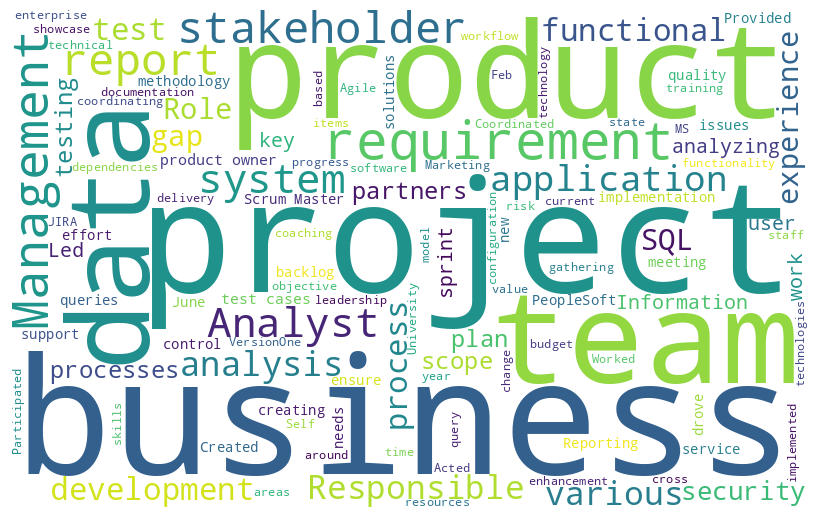

In [ ]:
# Create and generate a word cloud image for the best candidate for Job profile 1
wordcloud = WordCloud(width = 800, height = 500,background_color ='white',min_font_size = 10).generate(resumeTxt[754])

# Display the generated image
plt.figure(figsize = (20, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

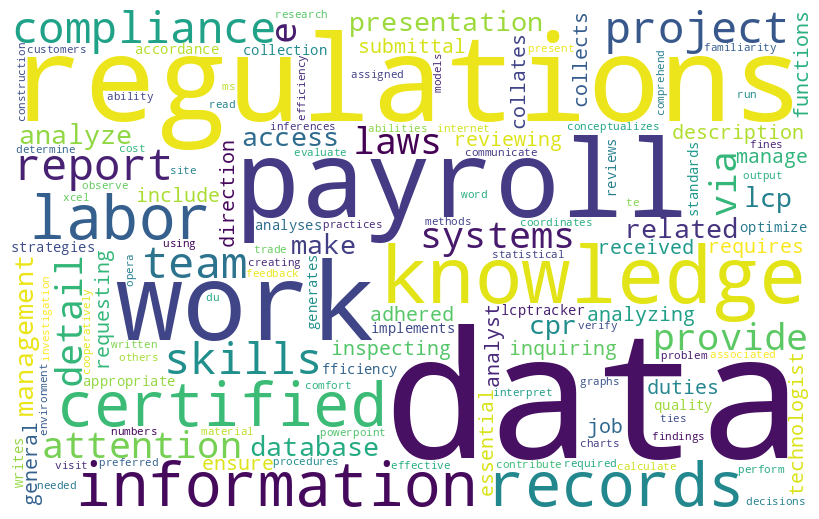

In [ ]:
# Create a world cloud of job description of a Profile 1
wordcloud = WordCloud(width = 800, height = 500,background_color='white',min_font_size = 10).generate(jds[0])

# Display the generated image
plt.figure(figsize = (20, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Job profile 2

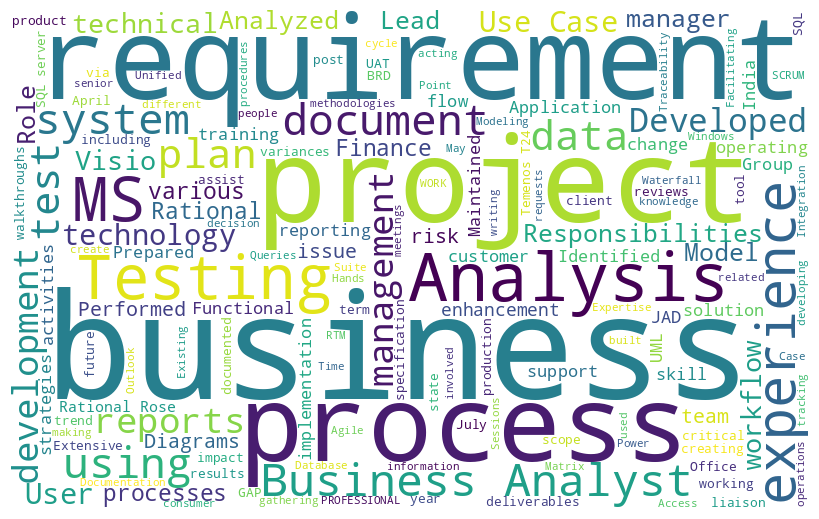

In [ ]:
# Create and generate a word cloud image for the best candidate for job profile 2
wordcloud = WordCloud(width = 800, height = 500,background_color ='white',min_font_size = 10).generate(resumeTxt[607])

# Display the generated image
plt.figure(figsize = (20, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

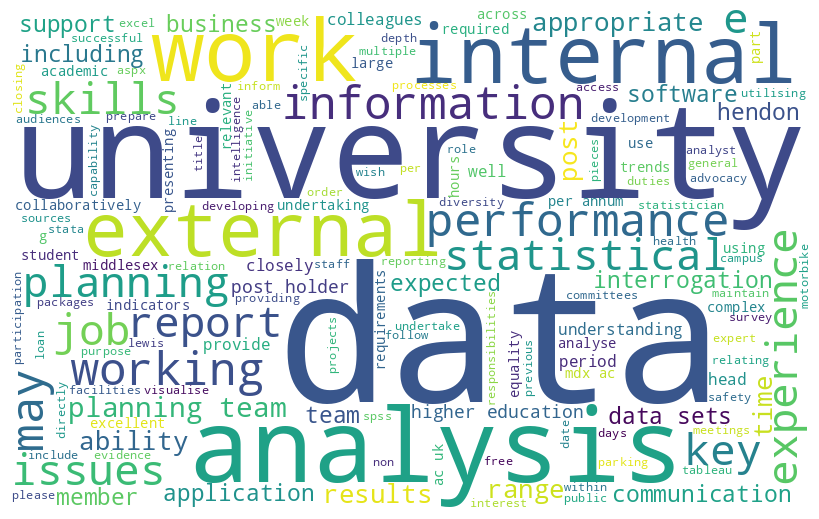

In [ ]:
# Create a world cloud of job description of a Java Developer
wordcloud = WordCloud(width = 800, height = 500,background_color='white',min_font_size = 10).generate(jds[1])

# Display the generated image
plt.figure(figsize = (20, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Database connection and Table creation

In [ ]:
# Database connection and table creation
import sqlite3
conn = sqlite3.connect('resume_database.db')
cursor = conn.cursor()

# Create the 'resumes' table
cursor.execute("CREATE TABLE IF NOT EXISTS pm_ranked_resumes (id INTEGER PRIMARY KEY AUTOINCREMENT, jd1_score REAL, candidate_name TEXT, phone_number TEXT, email_id TEXT, skills TEXT, experience INTEGER, company_name TEXT)")


# Create the 'pm_ranked_resumes' table
cursor.execute("CREATE TABLE IF NOT EXISTS ba_ranked_resumes (id INTEGER PRIMARY KEY AUTOINCREMENT, jd2_score REAL, candidate_name TEXT, phone_number TEXT, email_id TEXT, skills TEXT, experience INTEGER, company_name TEXT)")


# Create the 'ba_ranked_resumes' table
cursor.execute("CREATE TABLE IF NOT EXISTS resumes (id INTEGER PRIMARY KEY AUTOINCREMENT, filename TEXT, text TEXT, jd1_score REAL, jd2_score REAL, skills TEXT, experience INTEGER, company_name TEXT, phone_number TEXT, email_id TEXT, candidate_name TEXT)")
conn.commit()

# Insert data from 'dt' into 'resumes' table
for i, row in dt.iterrows():
    try:
        filename = df.loc[i, 'filename']  # Get filename from 'df' using index
    except KeyError:
        print(f"Warning: Filename not found for index {i}, skipping this resume.")
        continue  # Skip to the next resume

    cursor.execute("SELECT filename FROM resumes WHERE filename=?", (filename,))
    if not cursor.fetchone():  # Check if the resume is already in the database
        skills_str = ', '.join(row['Skills'])
        phone_number_str = ', '.join(row['Phone No.']) if row['Phone No.'] else None
        email_id_str = ', '.join(row['E-Mail ID']) if row['E-Mail ID'] else None
        # Corrected the INSERT statement
        cursor.execute("INSERT INTO resumes (filename, text, jd1_score, jd2_score, skills, experience, company_name, phone_number, email_id, candidate_name) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", (filename, row['Original Resume'], row['JD 1'], row['JD 2'], skills_str, row['Experience'], row['Company Name'],phone_number_str, email_id_str, row['Candidate\'s Name']))
conn.commit()
# ... (Your existing code to create pm and ba DataFrames using ranking logic) ...
# Insert data from 'pm' into 'pm_ranked_resumes' table
for index, row in pm.iterrows():
    cursor.execute("SELECT candidate_name FROM pm_ranked_resumes WHERE candidate_name=?", (row['Candidate\'s Name'],))
    if not cursor.fetchone():  # Check if candidate is already in the table
        skills_str = ', '.join(row['Skills']) if isinstance(row['Skills'], set) else row['Skills']
        phone_number_str = ', '.join(row['Phone No.']) if row['Phone No.'] else None
        email_id_str = ', '.join(row['E-Mail ID']) if row['E-Mail ID'] else None
        cursor.execute("INSERT INTO pm_ranked_resumes (jd1_score, candidate_name, phone_number, email_id, skills, experience, company_name) VALUES (?, ?, ?, ?, ?, ?, ?)", (row['JD 1'], row['Candidate\'s Name'], phone_number_str, email_id_str, skills_str, row['Experience'], row['Company Name']))
conn.commit()

# Insert data from 'ba' into 'ba_ranked_resumes' table
for index, row in ba.iterrows():
    cursor.execute("SELECT candidate_name FROM ba_ranked_resumes WHERE candidate_name=?", (row['Candidate\'s Name'],))
    if not cursor.fetchone():  # Check if candidate is already in the table
        skills_str = ', '.join(row['Skills']) if isinstance(row['Skills'], set) else row['Skills']
        phone_number_str = ', '.join(row['Phone No.']) if row['Phone No.'] else None
        email_id_str = ', '.join(row['E-Mail ID']) if row['E-Mail ID'] else None
        cursor.execute("INSERT INTO ba_ranked_resumes (jd2_score, candidate_name, phone_number, email_id, skills, experience, company_name) VALUES (?, ?, ?, ?, ?, ?, ?)", (row['JD 2'], row['Candidate\'s Name'], phone_number_str, email_id_str, skills_str, row['Experience'], row['Company Name']))
conn.commit()

# Close the database connection when you're finished
# Moved conn.close() to the end

# Querying DB

In [ ]:
#Get all resumes
conn = sqlite3.connect('resume_database.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM resumes")
all_resumes = cursor.fetchall()

# Create a pandas DataFrame from the results
# Get column names from cursor description
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(all_resumes, columns=columns)

# Display the DataFrame (which will be in a structured format)
print("All Resumes:")
print(df)

All Resumes:
      id filename                                               text  \
0      1  102.pdf          \nPRASHANT JOSHI                      ...   
1      2  103.pdf                                                ...   
2      3  107.pdf  Vijay Jawre                                   ...   
3      4  108.pdf   \n \n \n \n \n \n \n \n  \n                  ...   
4      5  100.pdf    \n                                          ...   
..   ...      ...                                                ...   
562  563   91.pdf  Career Objective:                             ...   
563  564   94.pdf  AYUSH JAIN Contact: 9759734784 Email:  ayushja...   
564  565   95.pdf  Ajay Kumar (CSM)\t     \t\t     Email/Skype: a...   
565  566   99.pdf  Pradeep Kumar Prasad\nC-09 Fourth Floor\nAman ...   
566  567   92.pdf  Alekhya\n\n(515)-518-0849\n\nalekhya.workmail@...   

     jd1_score  jd2_score                                             skills  \
0     0.023179   0.046866      basketball,

In [ ]:
# Query 1: Top 5 candidates for Job Profile 1
query1 = "SELECT * FROM pm_ranked_resumes ORDER BY jd1_score DESC LIMIT 5;"
df1 = pd.read_sql_query(query1, conn)
print("Top 5 candidates for Job Profile 1:")
print(df1)
print("\n") # Add an empty line for better readability

Top 5 candidates for Job Profile 1:
   id  jd1_score candidate_name     phone_number                  email_id  \
0   1   0.233158      Srivatsan     925-349 8018    sreevatsan77@gmail.com   
1   2   0.218572          ROLES             None                      None   
2   3   0.204605       Mohammad  +1 718-877-4291  mfarhantramboo@gmail.com   
3   4   0.203277     Saikrishna             None                      None   
4   5   0.194398        Kashyap     201-532-6397    kashyapkvora@gmail.com   

                                              skills  experience  \
0  strategy, Technology, records, research, sched...          16   
1  strategy, Technology, records, insurance, rese...          11   
2  Technology, Angular, records, schedules, Datab...          11   
3  Technology, research, Unified Modeling Languag...           5   
4  strategy, Technology, Regulations, records, in...          10   

                            company_name  
0                 Business Data Analysis  


In [ ]:
# Query 2: Top 10 candidates for Job Profile 2
query2 = "SELECT * FROM ba_ranked_resumes ORDER BY jd2_score DESC LIMIT 10;"
df2 = pd.read_sql_query(query2, conn)
print("Top 10 candidates for Job Profile 2:")
print(df2)
print("\n")

Top 10 candidates for Job Profile 2:
   id  jd2_score candidate_name     phone_number  \
0   1   0.277804      Srivatsan     925-349 8018   
1   2   0.236534         Vishal     469 920 9532   
2   3   0.234239        SUNITHA     614-375-4373   
3   4   0.230264        Kashyap     201-532-6397   
4   5   0.227728         Manish   (503) 922-3601   
5   6   0.227146           Amar     201-708-8565   
6   7   0.226190       NARENDRA     973-910-8941   
7   8   0.224126        Krishna    571) 933-8321   
8   9   0.221418       Mohammad  +1 718-877-4291   
9  10   0.219063        Navneet     801-770-3133   

                        email_id  \
0         sreevatsan77@gmail.com   
1         vishalsalman@gmail.com   
2  Sruthi@idolsoftconsulting.com   
3         kashyapkvora@gmail.com   
4         msingh.bsa12@gmail.com   
5           Amar.srbsa@gmail.com   
6         narenlenka99@gmail.com   
7      iahmed@saggisolutions.net   
8       mfarhantramboo@gmail.com   
9   richard@sonussoftwareinc.c

In [ ]:
# Query 3: resumes with experience >3
query = "SELECT * FROM resumes WHERE experience > 3;"
# Read query results into a pandas DataFrame
df = pd.read_sql_query(query, conn)
# Display the DataFrame (formatted as a table)
print("Candidates with experience > 3 years:")
print(df)

conn.close()

Candidates with experience > 3 years:
      id  filename                                               text  \
0      3   107.pdf  Vijay Jawre                                   ...   
1     26  1276.pdf  Qualifications Summary\nHighly skilled profess...   
2     27  1275.pdf  POST APPLIED FOR   :  MECHANICALPOST APPLIED F...   
3     32  1271.pdf  B I B H U T I  B H U S A N A  S A H U     \nA ...   
4     33  1279.pdf  Arockia Juslin Deepan\nDubai, UAE \nMobile: 97...   
..   ...       ...                                                ...   
187  549    80.pdf        HEMRAJ GURJAR                      \nCon...   
188  557    86.pdf  CURRICULAM   \n \nNAME         : - DEEPK CHAND...   
189  562    96.pdf  Adelina Erimia, PMP, Six Sigma Green Belt, SMC...   
190  565    95.pdf  Ajay Kumar (CSM)\t     \t\t     Email/Skype: a...   
191  567    92.pdf  Alekhya\n\n(515)-518-0849\n\nalekhya.workmail@...   

     jd1_score  jd2_score                                             skills  \
0    

# Accuracy

In [ ]:
# Example ground truth and system rankings (replace with your actual data)
ground_truth = {
    'job_id_1': ['resume_id_1', 'resume_id_3', 'resume_id_5'],
    'job_id_2': ['resume_id_2', 'resume_id_4', 'resume_id_6'],
}

system_rankings = {
    'job_id_1': ['resume_id_1', 'resume_id_2', 'resume_id_3', 'resume_id_4', 'resume_id_5'],
    'job_id_2': ['resume_id_2', 'resume_id_1', 'resume_id_4', 'resume_id_3', 'resume_id_6'],
}


#accuracy
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def calculate_metrics(ground_truth, system_rankings, k=2):
    all_relevant_resumes = []
    all_retrieved_resumes = []

    for job_id in ground_truth:
        relevant_resumes = ground_truth[job_id]
        retrieved_resumes = system_rankings[job_id][:k]  # Top k resumes

        all_relevant_resumes.extend(relevant_resumes)
        all_retrieved_resumes.extend(retrieved_resumes)

    # Accuracy calculation based on relevance, not order
    num_correct = 0
    for retrieved_resume in all_retrieved_resumes:
        if retrieved_resume in all_relevant_resumes:
            num_correct += 1
    accuracy = num_correct /(len(all_retrieved_resumes)+1) if len(all_retrieved_resumes) > 0 else 0
    # Precision, Recall, and F1-score (using micro-averaging)
    y_true = [1 if resume_id in relevant_resumes else 0 for resume_id in retrieved_resumes]
    y_pred = [1] * len(retrieved_resumes)  # Assume all retrieved are predicted relevant

    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    f1 = f1_score(y_true, y_pred, average='micro')

    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = calculate_metrics(ground_truth, system_rankings, k=5)  # Use top 5 for evaluation

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9091
Precision: 0.6000
Recall: 0.6000
F1-score: 0.6000


# Feedback of Resume

In [ ]:
def get_resume_feedback(resume_filename):
    """Fetches resume text and calculates scores for feedback."""

    conn = sqlite3.connect('resume_database.db')
    cursor = conn.cursor()

    # Fetch resume data from database using filename
    cursor.execute("SELECT text, jd1_score, jd2_score, skills, experience, company_name FROM resumes WHERE filename=?", (resume_filename,))
    resume_data = cursor.fetchone()

    if resume_data is None:
        return "Resume not found in the database."

    resume_text, jd1_score, jd2_score, skills_str, experience, company_name = resume_data
    skills = skills_str.split(', ') if skills_str else []

    feedback = []

    # --- Feedback based on JD scores ---
    if jd1_score > 0.8:
        feedback.append("Strong match for Job Profile 1: Your resume aligns well with the requirements.")
    elif jd1_score > 0.6:
        feedback.append("Potential match for Job Profile 1: Consider highlighting skills and experience related to [specific keywords from JD1].")
    else:
        feedback.append("Consider tailoring your resume for Job Profile 1: Focus on showcasing skills and experience relevant to [specific keywords from JD1].")

    if jd2_score > 0.7:
        feedback.append("Good match for Job Profile 2: Your resume demonstrates relevant skills and experience.")
    elif jd2_score > 0.5:
        feedback.append("Moderate match for Job Profile 2: Consider emphasizing skills and experience related to [specific keywords from JD2].")
    else:
        feedback.append("Consider improving your resume for Job Profile 2: Focus on highlighting skills and experience relevant to [specific keywords from JD2].")

    # --- Feedback based on skills and experience ---
    if len(skills) > 10:
        feedback.append("Impressive skillset: You possess a wide range of relevant skills.")
    elif len(skills) > 5:
        feedback.append("Good range of skills: Consider adding more in-demand skills like [suggestions based on industry trends].")
    else:
        feedback.append("Consider highlighting more relevant skills: Focus on skills that are highly sought after in [target job field].")

    if experience > 3:
        feedback.append(f"Valuable experience:Your experience is a significant asset.")
    elif experience > 1:
        feedback.append("Growing experience: Continue building your experience and highlighting your achievements.")
    else:
        feedback.append("Early career:Focus on showcasing your skills and potential, and consider relevant projects or internships.")

    if company_name:
        feedback.append(f"Recognizable company:Your experience is a positive highlight.")

    conn.close()
    feedback_str = "\n".join(feedback)
    feedback_str = feedback_str.replace('\n', ' ')  # Replace \n with spaces
    return feedback_str

In [ ]:
get_resume_feedback('101.pdf')

'Consider tailoring your resume for Job Profile 1: Focus on showcasing skills and experience relevant to [specific keywords from JD1]. Consider improving your resume for Job Profile 2: Focus on highlighting skills and experience relevant to [specific keywords from JD2]. Consider highlighting more relevant skills: Focus on skills that are highly sought after in [target job field]. Early career:Focus on showcasing your skills and potential, and consider relevant projects or internships. Recognizable company:Your experience is a positive highlight.'

In [ ]:
#when resume isn't in database
get_resume_feedback('302.pdf')

'Resume not found in the database.'

In [ ]:
get_resume_feedback('107.pdf')

'Consider tailoring your resume for Job Profile 1: Focus on showcasing skills and experience relevant to [specific keywords from JD1]. Consider improving your resume for Job Profile 2: Focus on highlighting skills and experience relevant to [specific keywords from JD2]. Impressive skillset: You possess a wide range of relevant skills. Valuable experience:Your experience is a significant asset. Recognizable company:Your experience is a positive highlight.'

# Flask connection

In [ ]:
!pip install Flask==2.3.2
!pip install ngrok
!pip install flask-ngrok
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pyngrok

# Application

In [ ]:
from flask import Flask, render_template, request, redirect, url_for, g, flash
import sqlite3
import pandas as pd
import os
from werkzeug.utils import secure_filename
from google.colab import output

# Flask web application
app = Flask(__name__)

# Configuration for file uploads
UPLOAD_FOLDER = '/content/uploads'
ALLOWED_EXTENSIONS = {'txt', 'pdf', 'docx', 'doc'}
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Ensure the upload folder exists
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

# Database connection
DATABASE = '/content/resume_database.db'

# Function to get database connection
def get_db():
    db = getattr(g, '_database', None)
    if db is None:
        db = g._database = sqlite3.connect(DATABASE)
    return db

# Close database connection when app context tears down
@app.teardown_appcontext
def close_connection(exception):
    db = getattr(g, '_database', None)
    if db is not None:
        db.close()

# Route for the home page (index)
@app.route('/')
def index():
    cursor = get_db().cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [row[0] for row in cursor.fetchall()]
    return render_template('index.html', tables=tables)

# Route to display a table
@app.route('/table/<table_name>')
def show_table(table_name):
    cursor = get_db().cursor()
    cursor.execute(f"PRAGMA table_info({table_name});")
    schema = cursor.fetchall()
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", get_db())
    table_html = df.to_html(classes='table table-striped')
    return render_template('table.html', table_name=table_name, schema=schema, table_html=table_html)

# Route to run queries
@app.route('/query', methods=['GET', 'POST'])
def run_query():
    if request.method == 'POST':
        query = request.form['query']
        try:
            df = pd.read_sql_query(query, get_db())
            result_html = df.to_html(classes='table table-striped')
            return render_template('query.html', result_html=result_html)
        except Exception as e:
            error = str(e)
            return render_template('query.html', error=error)
    return render_template('query.html')

# Helper function to check allowed file extensions
def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

# Route to upload a resume
@app.route('/upload', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        if 'file' not in request.files:
            flash('No file part')
            return redirect(request.url)
        file = request.files['file']
        if file.filename == '':
            flash('No selected file')
            return redirect(request.url)
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))
            flash('File uploaded successfully!')
            return redirect(url_for('index'))
    return '''
    <!doctype html>
    <title>Upload New File</title>
    <h1>Upload New File</h1>
    <form method=post enctype=multipart/form-data>
      <input type=file name=file>
      <input type=submit value=Upload>
    </form>
    '''

if __name__ == '__main__':
    # Start the Flask server on Colab's public interface
    print("Starting server...")
    app.run(host='0.0.0.0', port=8000)


Starting server...
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8000
 * Running on http://172.28.0.12:8000
INFO:werkzeug:Press CTRL+C to quit
